# Data Analysis and Logistic Regression Modeling for Cancer Survival Prediction

## Part 1: Libraries

### Importing Required Libraries for Data Analysis

In [1]:
# Importing pandas library for data manipulation and analysis
import pandas as pd

## Part 2: Importing and Cleaning the Dataset

### Loading the Dataset

In [2]:
# Loading the dataset from a CSV file
df = pd.read_csv('/Users/sanjanabongale/Desktop/FT/Projects Data/Cancer Data Analysis Project/cancer_patients_china.csv')

# Displaying the first 5 rows of the dataset to get an overview of the data
df.head()

,Patient_ID,Age,Gender,Province,Urban_Rural,Ethnicity,Occupation,Insurance_Type,Family_History,Cancer_Type,...,Immunotherapy,Targeted_Therapy,Survival_Status,Survival_Months,Recurrence_Status,Smoking_History,Alcohol_Use,BMI,Biomarker_1,Biomarker_2
0,CN_CA_00001,70,Male,Yunnan,Urban,Han,Retired,Self-pay,No,Esophageal,...,No,Yes,Alive,NaN,No,Never,Occasional,19.0,Negative,Low
1,CN_CA_00002,71,Male,Henan,Urban,Hui,Factory Worker,URBMI,No,Colorectal,...,No,No,Alive,NaN,No,Former,Regular,32.9,Negative,Medium
2,CN_CA_00003,42,Male,Hubei,Rural,Han,Unemployed,Self-pay,No,Breast,...,Yes,No,Deceased,59.0,Yes,Never,Never,32.3,Negative,NaN
3,CN_CA_00004,56,Female,Zhejiang,Rural,Han,Office Worker,NRCMS,No,Colorectal,...,No,Yes,Deceased,49.0,No,Former,Regular,20.0,Positive,Low
4,CN_CA_00005,29,Male,Guizhou,Rural,Han,Farmer,UEBMI,No,Breast,...,Yes,No,Alive,NaN,Yes,Former,Never,28.8,Negative,Medium


### Converting Columns to Proper Data Types

In [3]:
# Convert 'Diagnosis_Date' and 'Surgery_Date' columns to proper datetime format
# This ensures we can later perform time-based calculations or visualizations if needed.

df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce')  # Invalid formats will be set as NaT
df['Surgery_Date'] = pd.to_datetime(df['Surgery_Date'], errors='coerce')

### Cleaning Column Names

In [4]:
# Clean up column names to make them easier to work with
# We'll remove leading/trailing spaces, replace spaces with underscores,
# and remove any special characters.

df.columns = (
    df.columns
    .str.strip()                          # Remove leading/trailing spaces
    .str.replace(' ', '_')               # Replace spaces with underscores
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)  # Remove special characters
)

## Part 3: Exploratory Data Analysis (EDA)

### Understanding the Structure of the Dataset

In [5]:
# Getting the shape of the dataset (number of rows and columns)
print("Rows, Columns:", df.shape)

# Displaying the names of the columns in the dataset
print("\nColumns:\n", df.columns.tolist())

# Checking the data types of each column to understand how data is stored
print("\nData Types:\n", df.dtypes)

# Displaying a summary of the dataset (e.g., non-null values, memory usage)
df.info()

# Getting basic statistical information (mean, std, min, 25%, 50%, 75%, max) for numerical columns
df.describe()

Rows, Columns: (10000, 29)

Columns:
 ['Patient_ID', 'Age', 'Gender', 'Province', 'Urban_Rural', 'Ethnicity', 'Occupation', 'Insurance_Type', 'Family_History', 'Cancer_Type', 'Stage_at_Diagnosis', 'Diagnosis_Date', 'Symptoms', 'Metastasis_Sites', 'Tumor_Size', 'Treatment_Types', 'Surgery_Date', 'Chemotherapy_Drugs', 'Radiation_Sessions', 'Immunotherapy', 'Targeted_Therapy', 'Survival_Status', 'Survival_Months', 'Recurrence_Status', 'Smoking_History', 'Alcohol_Use', 'BMI', 'Biomarker_1', 'Biomarker_2']

Data Types:
 Patient_ID                    object
Age                            int64
Gender                        object
Province                      object
Urban_Rural                   object
Ethnicity                     object
Occupation                    object
Insurance_Type                object
Family_History                object
Cancer_Type                   object
Stage_at_Diagnosis            object
Diagnosis_Date        datetime64[ns]
Symptoms                      objec

,Age,Tumor_Size,Radiation_Sessions,Survival_Months,BMI
count,10000.000000,10000.000000,10000.000000,5245.000000,10000.000000
mean,61.179600,7.749400,15.008700,30.648236,24.967790
std,19.664491,4.158616,8.859496,17.399850,5.723172
min,18.000000,0.500000,0.000000,1.000000,15.000000
25%,46.000000,4.200000,8.000000,15.000000,20.000000
50%,64.000000,7.800000,15.000000,31.000000,25.000000
75%,78.000000,11.300000,23.000000,46.000000,29.800000
max,90.000000,15.000000,30.000000,60.000000,35.000000


### Previewing Unique Values in Categorical Columns

In [6]:
# Let's take a quick look at the unique values in some key categorical columns.
# This helps us understand the variety of entries and potential encoding or grouping we'll need later.
print("\nCancer Types:", df['Cancer_Type'].unique())           # Different types of cancers in the dataset
print("\nStages:", df['Stage_at_Diagnosis'].unique())          # Cancer stages present (e.g., I, II, III, IV)
print("\nGender:", df['Gender'].unique())                      # Gender distribution (Male/Female)
print("\nProvince:", df['Province'].unique())                  # Geographical diversity of patients


Cancer Types: ['Esophageal' 'Colorectal' 'Breast' 'Stomach' 'Liver' 'Cervical' 'Lung']

Stages: ['I' 'II' 'III' 'IV']

Gender: ['Male' 'Female']

Province: ['Yunnan' 'Henan' 'Hubei' 'Zhejiang' 'Guizhou' 'Jilin' 'Hebei' 'Hunan'
 'Tibet' 'Chongqing' 'Jiangxi' 'Taiwan' 'Liaoning' 'Shanxi' 'Gansu'
 'Shaanxi' 'Fujian' 'Anhui' 'Macau' 'Shandong' 'Tianjin' 'Ningxia'
 'Shanghai' 'Hong Kong' 'Heilongjiang' 'Xinjiang' 'Inner Mongolia'
 'Sichuan' 'Jiangsu' 'Beijing' 'Guangdong' 'Qinghai']


### Checking for Missing Values

In [7]:
# Checking for missing values in each column
# This helps identify columns that may need data cleaning or imputation
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Province                 0
Urban_Rural              0
Ethnicity                0
Occupation               0
Insurance_Type           0
Family_History           0
Cancer_Type              0
Stage_at_Diagnosis       0
Diagnosis_Date           0
Symptoms               501
Metastasis_Sites       971
Tumor_Size               0
Treatment_Types        517
Surgery_Date          7575
Chemotherapy_Drugs    1016
Radiation_Sessions       0
Immunotherapy            0
Targeted_Therapy         0
Survival_Status          0
Survival_Months       4755
Recurrence_Status        0
Smoking_History          0
Alcohol_Use              0
BMI                      0
Biomarker_1            993
Biomarker_2            998
dtype: int64

## Part 4: Data Cleaning and Preprocessing

### Handling Missing Values

In [8]:
# Filling missing values in categorical columns with appropriate default values
# These defaults help keep data consistent and avoid issues during encoding or modeling
df['Symptoms'].fillna('Unknown', inplace=True)
df['Metastasis_Sites'].fillna('None', inplace=True)
df['Treatment_Types'].fillna('Unknown', inplace=True)
df['Chemotherapy_Drugs'].fillna('Unknown', inplace=True)
df['Biomarker_1'].fillna('Not Tested', inplace=True)
df['Biomarker_2'].fillna('Not Tested', inplace=True)

# Rechecking for missing values after handling them earlier
# This ensures we've successfully cleaned all the null entries we intended to fix
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Province                 0
Urban_Rural              0
Ethnicity                0
Occupation               0
Insurance_Type           0
Family_History           0
Cancer_Type              0
Stage_at_Diagnosis       0
Diagnosis_Date           0
Symptoms                 0
Metastasis_Sites         0
Tumor_Size               0
Treatment_Types          0
Surgery_Date          7575
Chemotherapy_Drugs       0
Radiation_Sessions       0
Immunotherapy            0
Targeted_Therapy         0
Survival_Status          0
Survival_Months       4755
Recurrence_Status        0
Smoking_History          0
Alcohol_Use              0
BMI                      0
Biomarker_1              0
Biomarker_2              0
dtype: int64

### Creating New Columns

In [9]:
# Creating a new binary column 'Had_Surgery' based on whether 'Surgery_Date' exists
# If the patient has a date recorded, we consider that surgery was performed
df['Had_Surgery'] = df['Surgery_Date'].notnull().astype(int)

# Adjusting the 'Survival_Months' column
# We retain survival months only for patients who are deceased, otherwise set it to None
df['Survival_Months'] = df.apply(
    lambda row: row['Survival_Months'] if row['Survival_Status'] == 'Deceased' else None,
    axis=1
)

### Save Cleaned Dataset

In [10]:
# After handling missing values, transforming columns, and performing exploratory data analysis (EDA), 
# we now save the cleaned version of the dataset to a new CSV file for further analysis or modeling.
# The 'index=False' ensures that the index column is not included in the saved file.

df.to_csv('cleaned_cancer_dataset.csv', index=False)  # Save the cleaned data to a CSV file

## Part 5: Data Visualization

### Setting Up Visualization Tools

In [11]:
# Import libraries for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style to make plots cleaner and easier to read
sns.set(style='whitegrid')

### Visualizing Key Features

### 1. Age Distribution

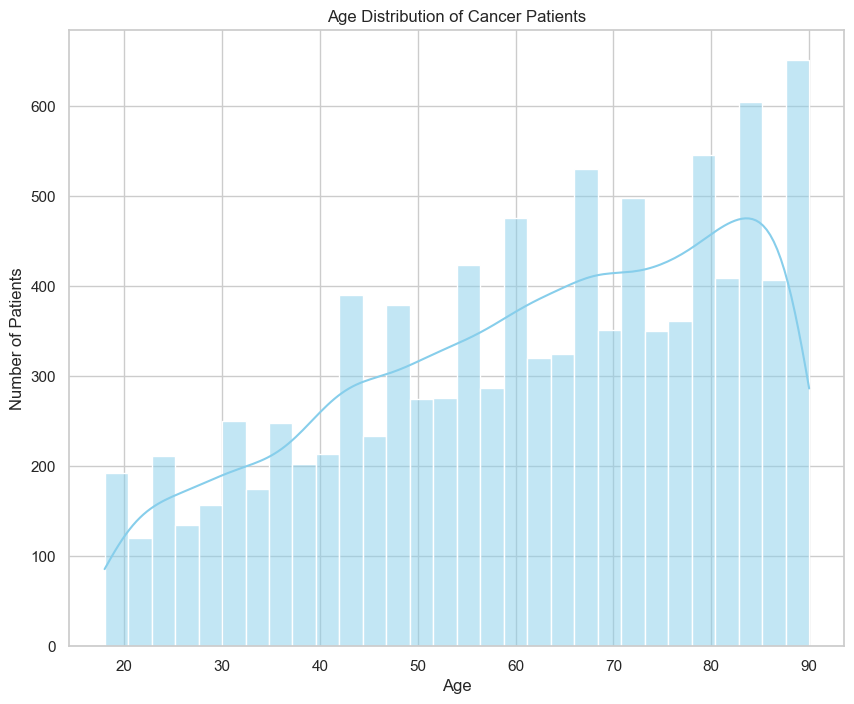

In [12]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')  # Plot the histogram with a KDE curve to show the distribution
plt.title('Age Distribution of Cancer Patients')  # Adding a title to the plot
plt.xlabel('Age')  # X-axis Label
plt.ylabel('Number of Patients')  # Y-axis Label
plt.show()  # Display the plot

### 2. Gender Distribution

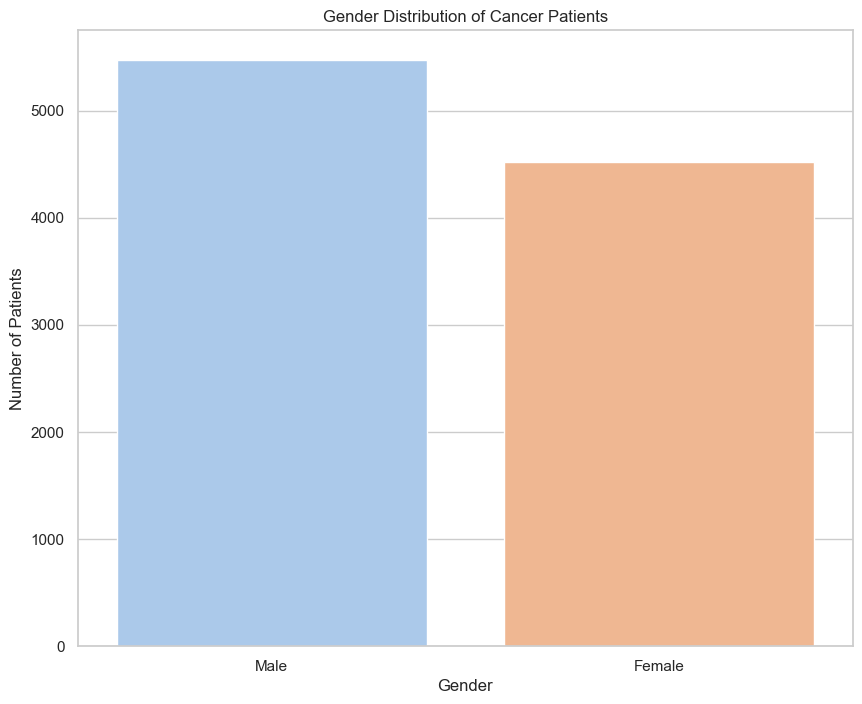

In [13]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
sns.countplot(data=df, x='Gender', palette='pastel')  # Count the number of occurrences for each gender category
plt.title('Gender Distribution of Cancer Patients')  # X-axis Label Female --> 0 Male --> 1
plt.ylabel('Number of Patients')  # Y-axis Label
plt.show()  # Display the plot

### 3. Cancer Types Distribution

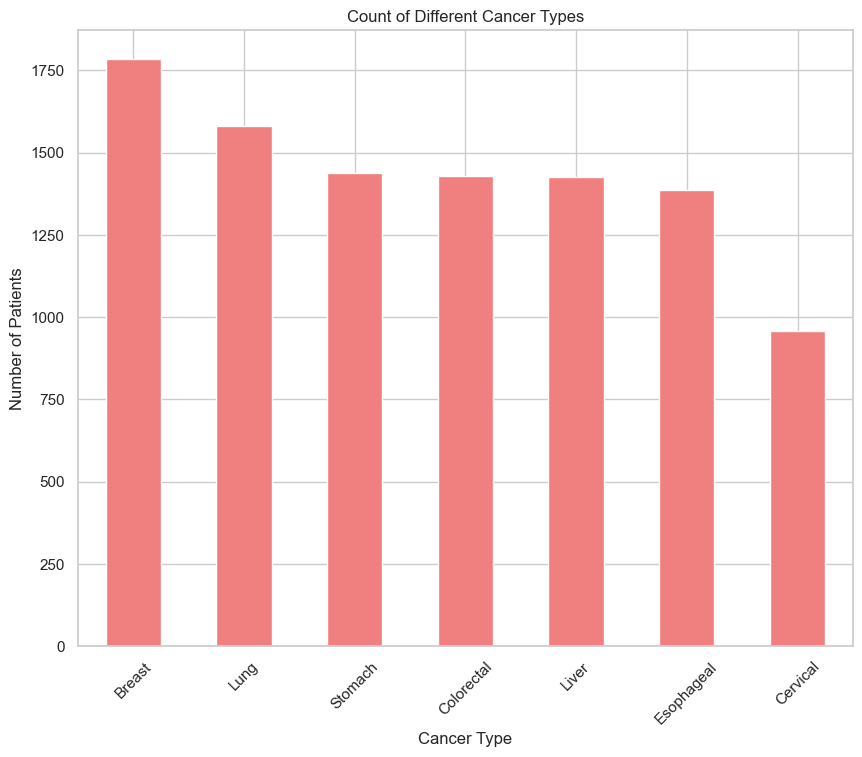

In [14]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
df['Cancer_Type'].value_counts().plot(kind='bar', color='lightcoral')  # Plot the count of each cancer type
plt.title('Count of Different Cancer Types')  # Title for the cancer type distribution plot
plt.xlabel('Cancer Type')  # X-axis Label
plt.ylabel('Number of Patients')  # Y-axis Label
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

### 4. Stage at Diagnosis Distribution

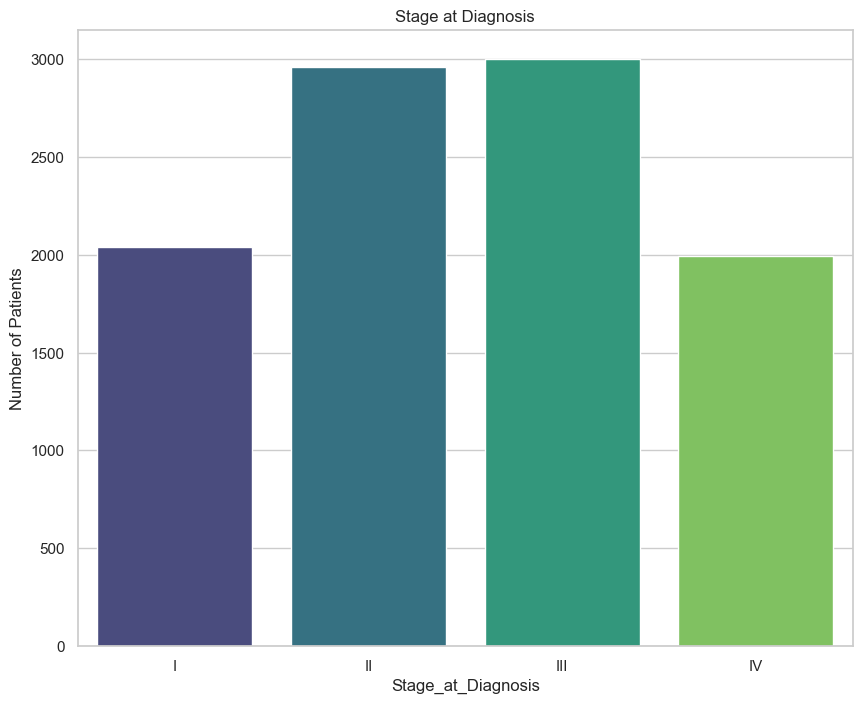

In [15]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
sns.countplot(data=df, x='Stage_at_Diagnosis', order=sorted(df['Stage_at_Diagnosis'].unique()), palette='viridis')  # Plot the count for each stage
plt.title('Stage at Diagnosis')  # X-axis Label
plt.ylabel('Number of Patients')  # Y-axis Label
plt.show()  # Display the plot

### 5. Urban vs Rural Distribution

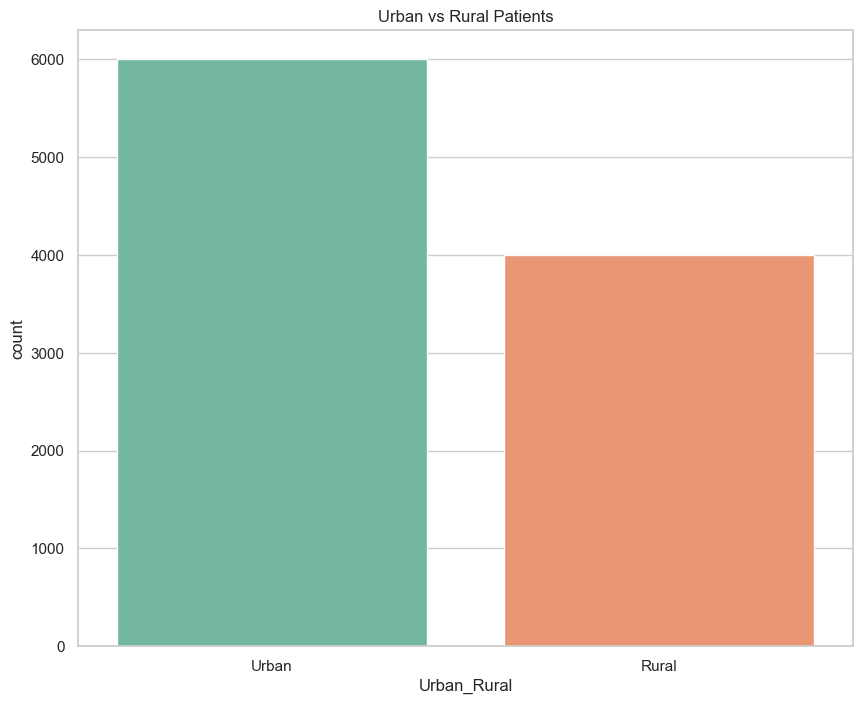

In [16]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
sns.countplot(data=df, x='Urban_Rural', palette='Set2')  # Plot the count for Urban and Rural categories
plt.title('Urban vs Rural Patients')  # Title for the plot
plt.show()  # Display the plot

### 6. Survival Status Count

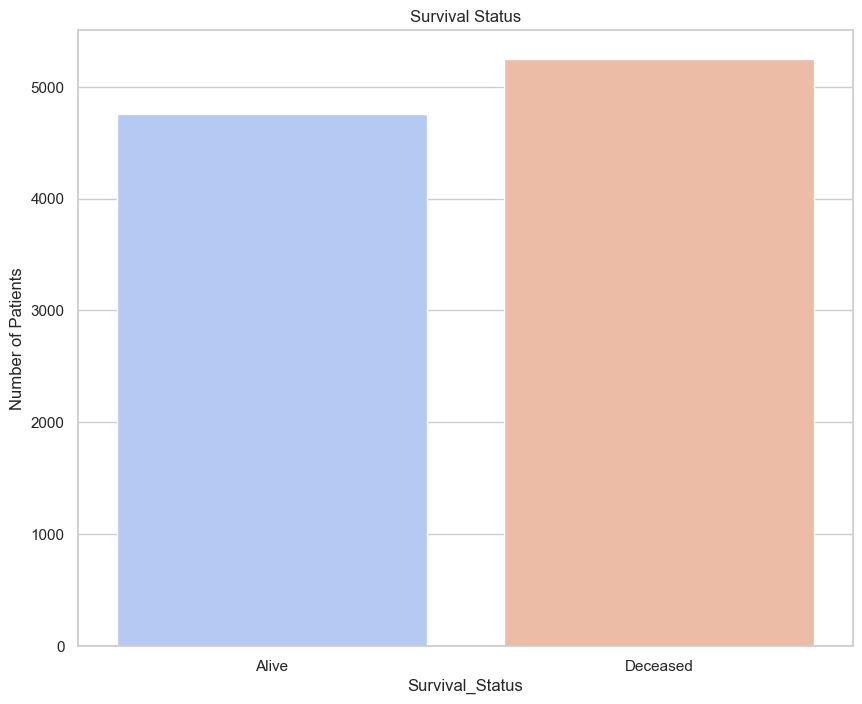

In [17]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
sns.countplot(data=df, x='Survival_Status', palette='coolwarm')  # Plot the count for Survival Status categories
plt.title('Survival Status')  # Title for the plot
plt.ylabel('Number of Patients')  # Label for the y-axis
plt.show()  # Display the plot

### 7. Survival by Cancer Type

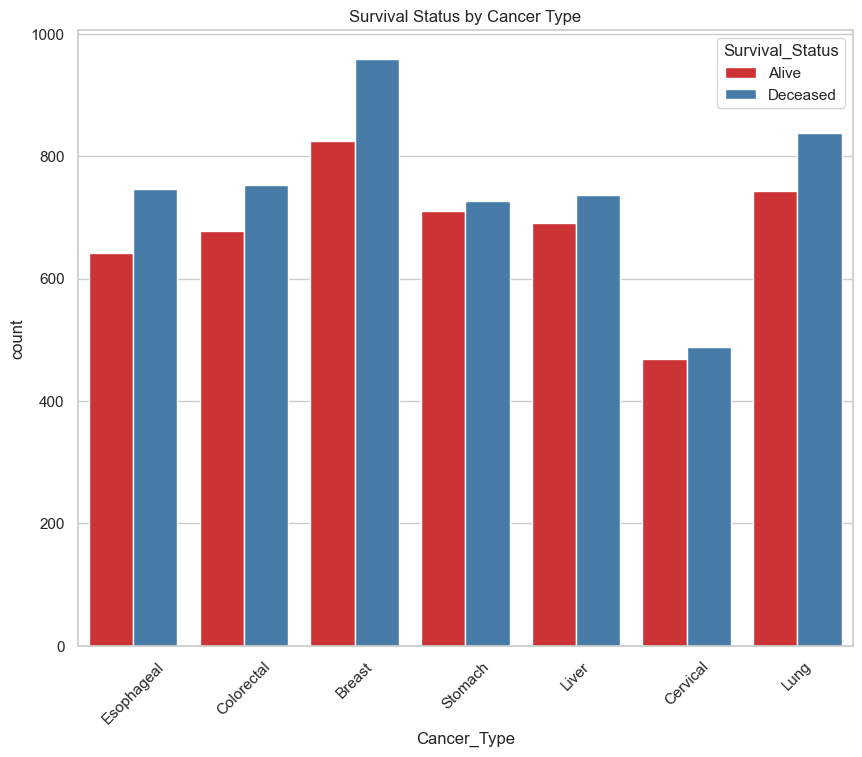

In [18]:
plt.figure(figsize=(10, 8))  # Set the figure size for clarity
sns.countplot(data=df, x='Cancer_Type', hue='Survival_Status', palette='Set1')  # Plot survival status across cancer types
plt.title('Survival Status by Cancer Type')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

### 8. Number of Patients by Province

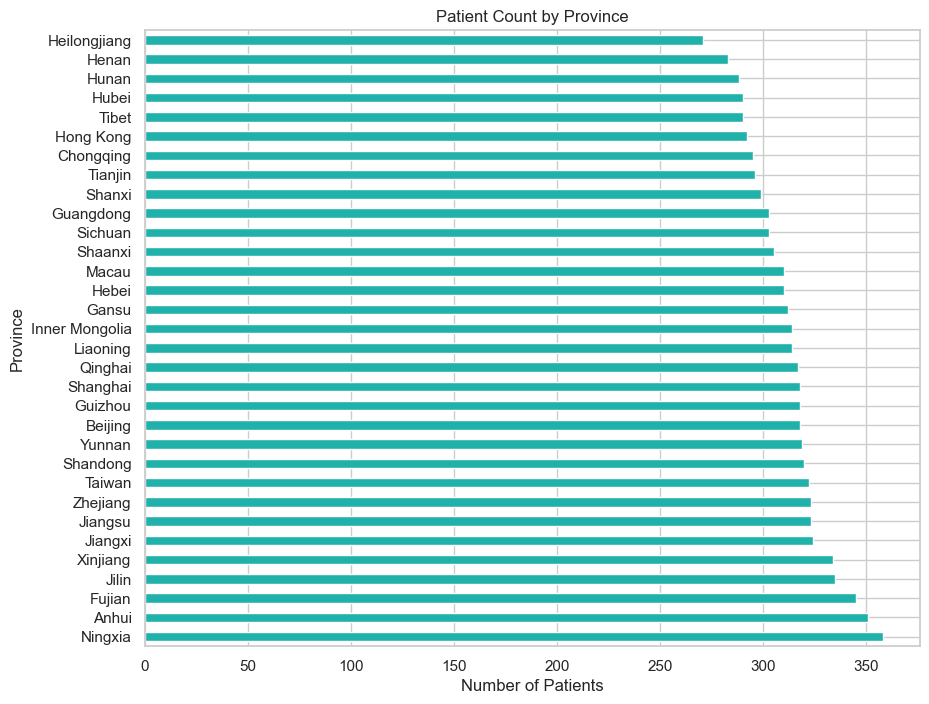

In [19]:
plt.figure(figsize=(10, 8))  # Set the figure size for clarity
df['Province'].value_counts().plot(kind='barh', color='lightseagreen')  # Plot the number of patients per province
plt.title('Patient Count by Province')  # Title for the plot
plt.xlabel('Number of Patients')  # X-axis Label
plt.ylabel('Province')  # Y-axis Label
plt.show()  # Display the plot (i want a different kind of visualisation because there are too many provincesand too many bars

### 9. Survival Status in the Top 10 Most Affected Provinces

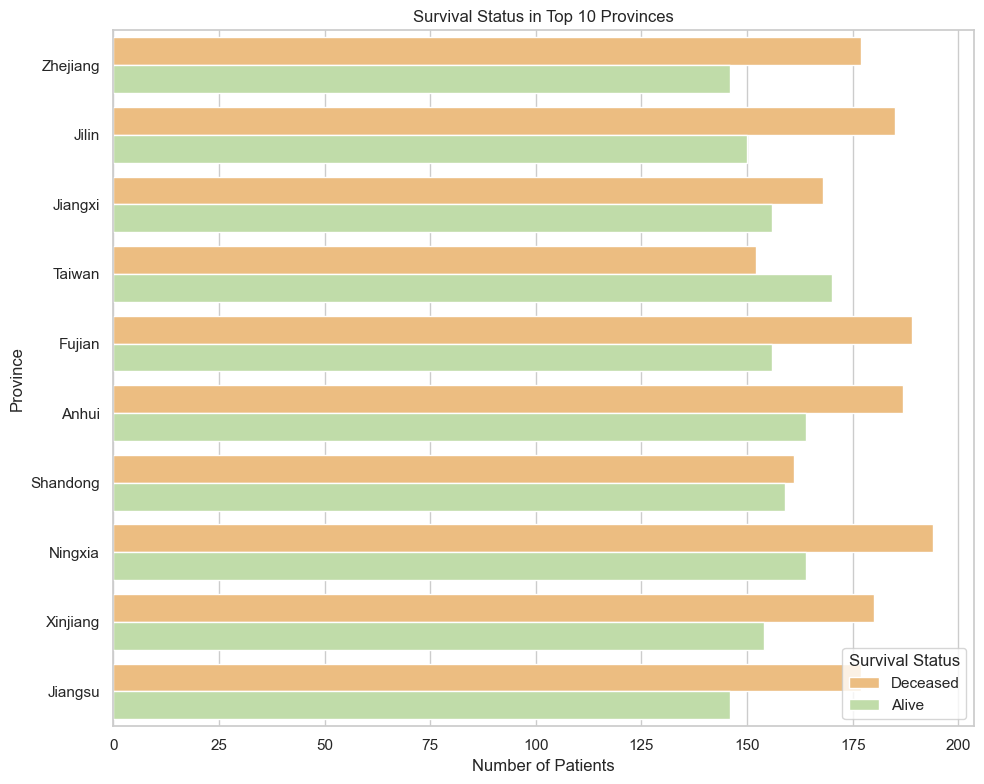

In [20]:
plt.figure(figsize=(10, 8))
top_provinces = df['Province'].value_counts().nlargest(10).index
subset = df[df['Province'].isin(top_provinces)]

sns.countplot(data=subset, y='Province', hue='Survival_Status', palette='Spectral')
plt.title('Survival Status in Top 10 Provinces')
plt.xlabel('Number of Patients')
plt.ylabel('Province')
plt.legend(title='Survival Status', loc='lower right')
plt.tight_layout()
plt.show()

### 10. Treatment Types by Stage at Diagnosis

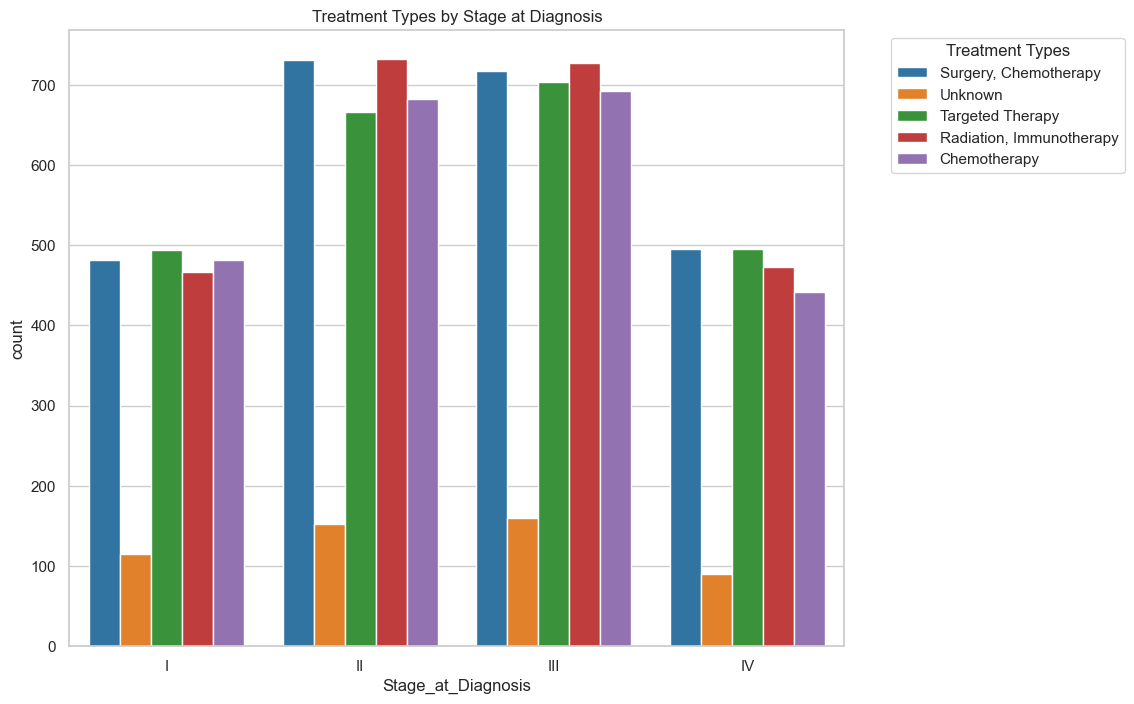

In [21]:
plt.figure(figsize=(10, 8))  # Set the figure size for clarity
sns.countplot(data=df, x='Stage_at_Diagnosis', hue='Treatment_Types', palette='tab10')  # Plot the treatment types by stage
plt.title('Treatment Types by Stage at Diagnosis')  # Title for the plot
plt.legend(title='Treatment Types', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()  # Display the plot

### 11. Average Survival Months by Stage

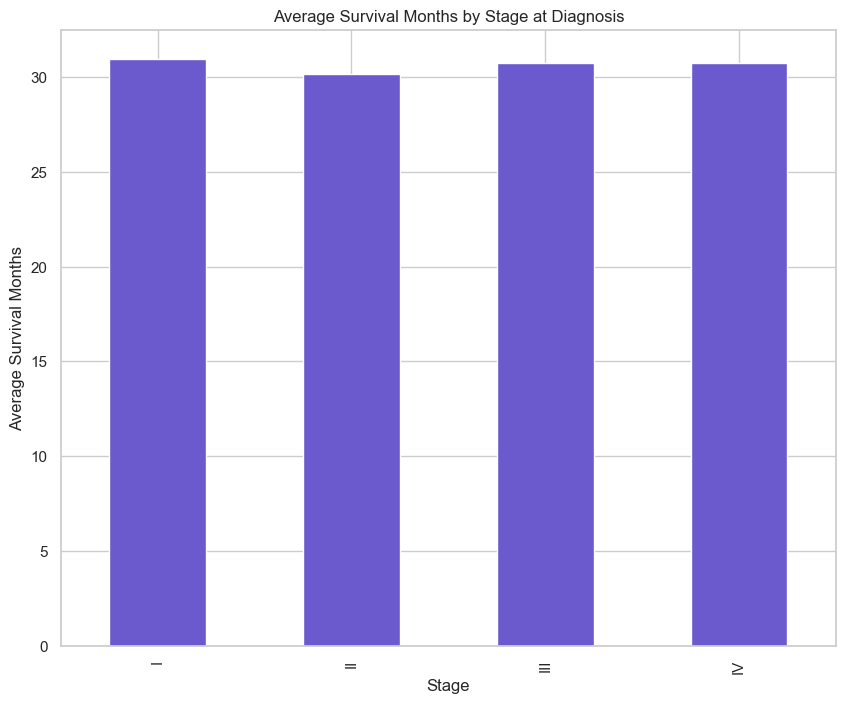

In [22]:
plt.figure(figsize=(10, 8))
df.groupby('Stage_at_Diagnosis')['Survival_Months'].mean().plot(kind='bar', color='slateblue')
plt.title('Average Survival Months by Stage at Diagnosis')  # Set the title for the plot
plt.ylabel('Average Survival Months')  # Label for the y-axis
plt.xlabel('Stage')  # Label for the x-axis
plt.show()  # Display the plot

### 12. Smoking History vs Cancer Type

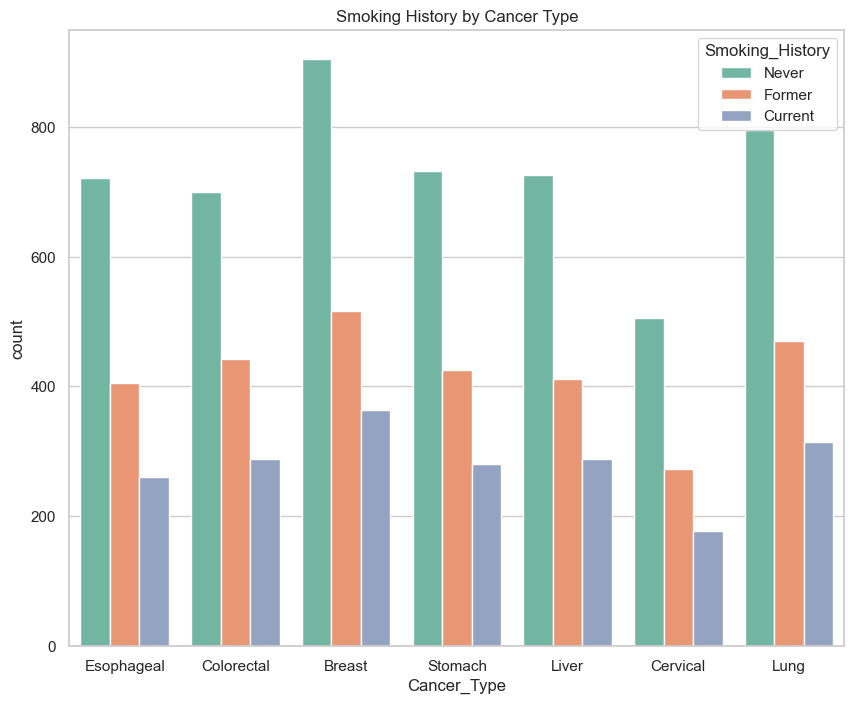

In [23]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.countplot(data=df, x='Cancer_Type', hue='Smoking_History', palette='Set2')  # Plot the count of smoking history by cancer type
plt.title('Smoking History by Cancer Type')  # Set the title for the plot
plt.show()  # Display the plot

### 13. Smoking History vs Survival Status

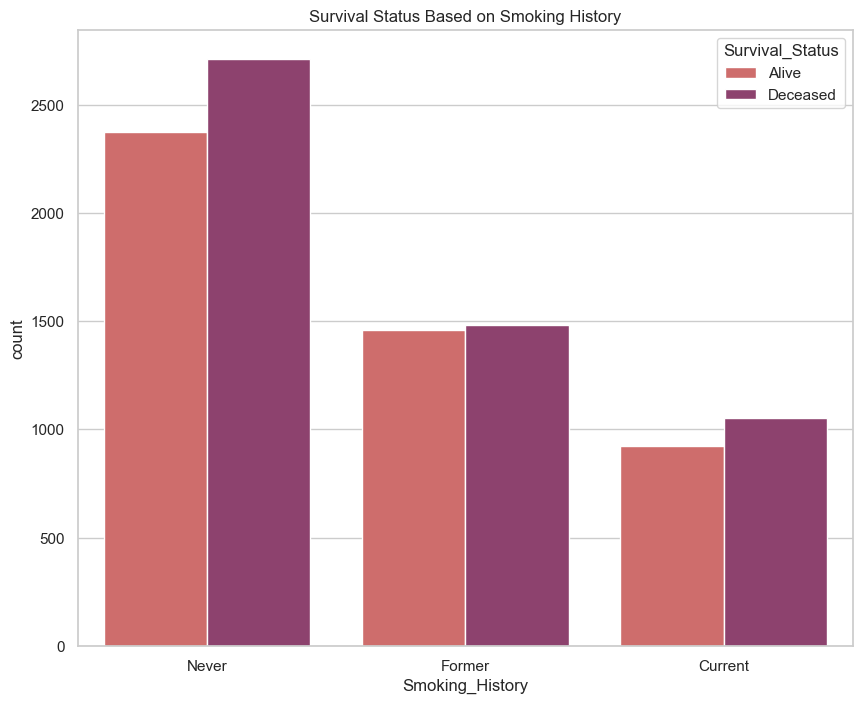

In [24]:
plt.figure(figsize=(10, 8))  # Set the figure size for the plot
sns.countplot(data=df, x='Smoking_History', hue='Survival_Status', palette='flare')  # Plot the count of survival status by smoking history
plt.title('Survival Status Based on Smoking History')  # Set the title of the plot
plt.show()  # Display the plot

## Part 6: Prediction Model

### Preparing Data for Model Building

In [25]:
# Checking the final column names and data types in the dataset before building the model.
# This step ensures that all the data is in the correct format and ready for the model.

print("\nData Types:\n", df.dtypes)  # Display the data types of each column

df.head()  # Display the first few rows of the dataset to verify the data structure


Data Types:
 Patient_ID                    object
Age                            int64
Gender                        object
Province                      object
Urban_Rural                   object
Ethnicity                     object
Occupation                    object
Insurance_Type                object
Family_History                object
Cancer_Type                   object
Stage_at_Diagnosis            object
Diagnosis_Date        datetime64[ns]
Symptoms                      object
Metastasis_Sites              object
Tumor_Size                   float64
Treatment_Types               object
Surgery_Date          datetime64[ns]
Chemotherapy_Drugs            object
Radiation_Sessions             int64
Immunotherapy                 object
Targeted_Therapy              object
Survival_Status               object
Survival_Months              float64
Recurrence_Status             object
Smoking_History               object
Alcohol_Use                   object
BMI                     

,Patient_ID,Age,Gender,Province,Urban_Rural,Ethnicity,Occupation,Insurance_Type,Family_History,Cancer_Type,...,Targeted_Therapy,Survival_Status,Survival_Months,Recurrence_Status,Smoking_History,Alcohol_Use,BMI,Biomarker_1,Biomarker_2,Had_Surgery
0,CN_CA_00001,70,Male,Yunnan,Urban,Han,Retired,Self-pay,No,Esophageal,...,Yes,Alive,NaN,No,Never,Occasional,19.0,Negative,Low,1
1,CN_CA_00002,71,Male,Henan,Urban,Hui,Factory Worker,URBMI,No,Colorectal,...,No,Alive,NaN,No,Former,Regular,32.9,Negative,Medium,1
2,CN_CA_00003,42,Male,Hubei,Rural,Han,Unemployed,Self-pay,No,Breast,...,No,Deceased,59.0,Yes,Never,Never,32.3,Negative,Not Tested,1
3,CN_CA_00004,56,Female,Zhejiang,Rural,Han,Office Worker,NRCMS,No,Colorectal,...,Yes,Deceased,49.0,No,Former,Regular,20.0,Positive,Low,0
4,CN_CA_00005,29,Male,Guizhou,Rural,Han,Farmer,UEBMI,No,Breast,...,No,Alive,NaN,Yes,Former,Never,28.8,Negative,Medium,1


### Importing Required Libraries for Model Building

In [26]:
# train_test_split for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# LabelEncoder for encoding categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder

# LogisticRegression for building the logistic regression model
from sklearn.linear_model import LogisticRegression

# accuracy_score, classification_report, and confusion_matrix for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SimpleImputer for handling missing values during model training
from sklearn.impute import SimpleImputer

### Working on the Model

### Step 1: Handling Missing Values and Encoding Categorical Features

In [27]:
# Handling missing values by replacing them with the most frequent value in each column.
# This step ensures that we don't lose data due to missing values.
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical features into numerical format using LabelEncoder.
# LabelEncoder transforms each category in a column into a unique integer value.
# This is important as machine learning models require numerical inputs.
label_columns = ['Gender', 'Province', 'Urban_Rural', 'Ethnicity', 'Occupation', 'Insurance_Type', 
                 'Family_History', 'Cancer_Type', 'Stage_at_Diagnosis', 'Symptoms', 
                 'Metastasis_Sites', 'Treatment_Types', 'Chemotherapy_Drugs', 'Immunotherapy', 
                 'Targeted_Therapy', 'Recurrence_Status', 'Smoking_History', 'Alcohol_Use', 
                 'Biomarker_1', 'Biomarker_2']

# Apply LabelEncoder to each categorical column for conversion into integers.
le = LabelEncoder()
for col in label_columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Convert the target variable 'Survival_Status' into binary format (1: Survived, 0: Not Survived).
# This ensures that the model can classify the patients based on their survival status.
df['Survival_Status'] = le.fit_transform(df['Survival_Status'].astype(str))

### Step 2: Defining Features and Target Variables

In [28]:
# 'X' represents the feature set (all columns except 'Patient_ID', 'Diagnosis_Date', 'Surgery_Date', and 'Survival_Status').
# These columns are not necessary for prediction, so we drop them.
X = df.drop(columns=['Patient_ID', 'Diagnosis_Date', 'Surgery_Date', 'Survival_Status'])

# 'y' is the target variable, which in this case is 'Survival_Status'.
# This is the variable the model will learn to predict based on the features.
y = df['Survival_Status']

### Step 3: Splitting Data into Training and Testing Sets

In [29]:
# 'train_test_split' splits the dataset into training and testing sets.
# 80% of the data is used for training and 20% for testing. 
# 'random_state' ensures the split is reproducible by fixing the random seed.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Logistic Regression Model Training

In [30]:
# Creating an instance of the LogisticRegression model.
# The 'random_state' ensures that the results are reproducible.
# The 'fit' function trains the model using the training data (X_train, y_train).

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/Users/sanjanabongale/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Step 5: Making Predictions

In [31]:
# After training the model, we use the 'predict' function to make predictions
# on the test data (X_test). The predicted values are stored in 'y_pred'.
y_pred = model.predict(X_test)

### Step 6: Model Evaluation

In [32]:
# Now, we evaluate the model's performance by calculating the accuracy score.
# The accuracy score compares the predicted values (y_pred) with the actual values from the test set (y_test).
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 77.90%

Confusion Matrix:
[[809 137]
 [305 749]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       946
           1       0.85      0.71      0.77      1054

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



### Example Patient Data for Prediction

In [33]:
# Example patient data to test
# Replace these values with actual patient data in the correct order
new_patient = [[70, 1, 30, 1, 0, 3, 1, 0, 3, 1, 0, 15.0, 0, 2, 1, 19.0, 0, 1, 12.0, 0, 1, 1, 22.5, 0, 2, 1]]

# Create a DataFrame using the same column order as your model was trained on
new_df = pd.DataFrame(new_patient, columns=X.columns)

# Predict the class (0 or 1)
prediction = model.predict(new_df)
print("Survival Prediction (0 = Not Survived, 1 = Survived):", prediction[0])

# Predict probability (optional)
probability = model.predict_proba(new_df)
print("Survival Probability [Not Survived, Survived]:", probability[0])

Survival Prediction (0 = Not Survived, 1 = Survived): 0
Survival Probability [Not Survived, Survived]: [0.78003744 0.21996256]


### Plotting Model Performance

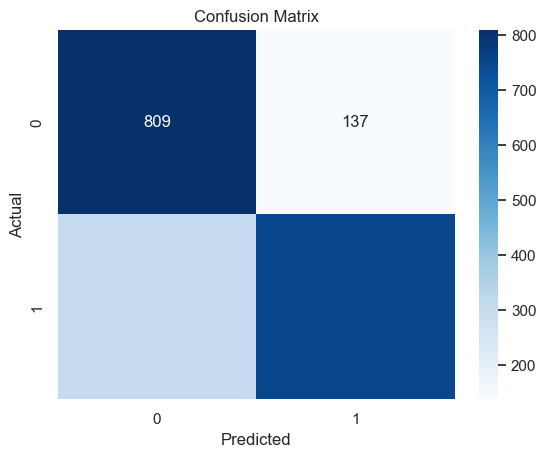

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       946
           1       0.85      0.71      0.77      1054

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



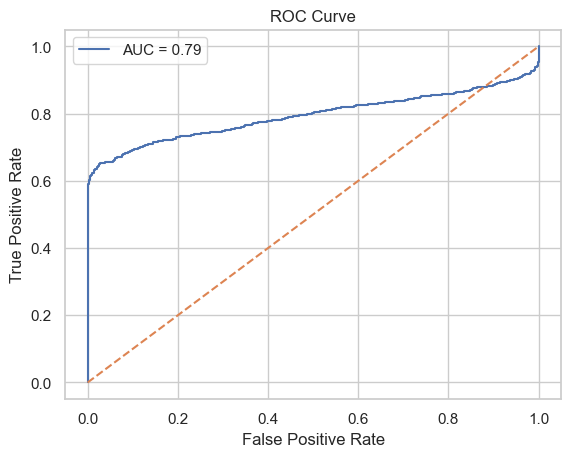

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Confusion Matrix:

The heatmap will show the number of correct and incorrect predictions.

- Diagonal elements represent correct predictions (True Positives and True Negatives), while off-diagonal elements represent misclassifications.
- True Positives (TP): Correctly predicted the positive class.
- True Negatives (TN): Correctly predicted the negative class.
- False Positives (FP): Incorrectly predicted the positive class when it was actually negative.
- False Negatives (FN): Incorrectly predicted the negative class when it was actually positive.

### Classification Report:

- **Precision**: The proportion of positive predictions that are actually correct. It indicates how many of the predicted positive cases were actually true.
  
- **Recall**: The proportion of actual positives that are correctly identified. It reflects how many of the actual positive cases were correctly predicted.
  
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two. It is a better measure than accuracy for imbalanced datasets.
  
- **Support**: The number of actual occurrences of the class in the dataset. It helps you understand how much each class is represented in the data.

### ROC Curve:

- The curve shows the trade-off between sensitivity (True Positive Rate) and 1-specificity (False Positive Rate).
- **Sensitivity (True Positive Rate)**: The proportion of actual positives correctly identified.
- **1 - Specificity (False Positive Rate)**: The proportion of actual negatives incorrectly identified as positive.
  
- The **AUC** value quantifies how well the model distinguishes between classes:
  - A higher AUC (closer to 1) indicates better model performance in distinguishing between the positive and negative classes.
  - An AUC value of 0.5 suggests the model is no better than random guessing.


### Analyzing Feature Importance for Predicting Survival

               Feature  Coefficient
9   Stage_at_Diagnosis     0.468475
19   Recurrence_Status    -0.242385
25         Had_Surgery    -0.218517
18     Survival_Months     0.115628
17    Targeted_Therapy    -0.110016
7       Family_History     0.091571
20     Smoking_History     0.085659
23         Biomarker_1    -0.071827
14  Chemotherapy_Drugs    -0.046358
10            Symptoms     0.037155


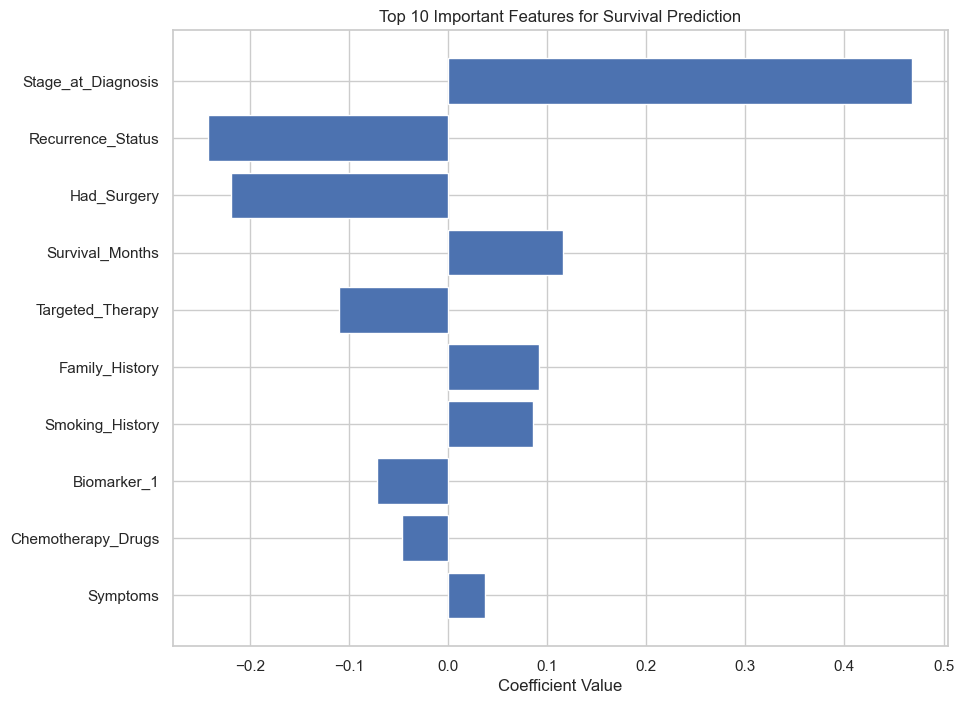

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Getting feature names and their coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Creating a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Importance': np.abs(coefficients)
})

# Sorting by absolute importance
importance_df = importance_df.sort_values(by='Absolute_Importance', ascending=False)

# Displaying top features
print(importance_df[['Feature', 'Coefficient']].head(10))

# Optional: Plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:10], importance_df['Coefficient'][:10])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Important Features for Survival Prediction")
plt.gca().invert_yaxis()
plt.show()

### What the Columns Mean:

- **Feature**: The column name from the dataset.
- **Coefficient**: The value assigned by the model to each feature. It reflects how much that feature influences the survival prediction.
  - A **positive coefficient** means the feature increases the likelihood of survival.
  - A **negative coefficient** means the feature decreases the likelihood of survival.

---

### Feature-by-Feature Breakdown:

| **Feature**               | **Meaning**                                                                                              |
|---------------------------|----------------------------------------------------------------------------------------------------------|
| **Stage_at_Diagnosis** (0.468)  | The stage at which cancer was diagnosed is the most influential. A higher stage (advanced cancer) may decrease survival, but since the coefficient is positive, it might mean early stages are coded with higher values, or the encoding is reversed — you'd need to confirm your data encoding. |
| **Recurrence_Status** (-0.242) | A negative value suggests that if cancer recurs, the chances of survival decrease. Makes clinical sense. |
| **Had_Surgery** (-0.218)   | Oddly negative — this might indicate people who had surgery had more severe cases, or again it might be due to encoding. Double-check if 1 = Yes or 0 = Yes. |
| **Survival_Months** (0.116)  | Obvious — more months alive = more survival. This might be leaking the target into the features if you're trying to predict survival itself. Be careful. |
| **Targeted_Therapy** (-0.11) | Slight negative impact — possibly patients on this therapy were already in later stages. |
| **Family_History** (0.092)  | Positive — patients with family history might be more proactive, leading to earlier detection. Interesting pattern. |
| **Smoking_History** (0.086) | Positive — maybe people who smoked had earlier checkups. Again, encoding needs to be checked (maybe 0 is current smoker?). |
| **Biomarker_1** (-0.072)  | Some biomarker — negative impact, possibly linked with aggressive tumor biology. |
| **Chemotherapy_Drugs** (-0.046) | Slight negative — again could mean those who needed chemo were in later stages. |
| **Symptoms** (0.037)     | Very small positive effect — may mean symptomatic detection helped early diagnosis. |

---

### Observations:
- **Positive Coefficients**: Features like **Stage_at_Diagnosis**, **Survival_Months**, **Family_History**, and **Smoking_History** seem to suggest that certain factors (such as family history and smoking) may positively influence survival, perhaps by allowing for earlier detection or proactive measures.
- **Negative Coefficients**: Features like **Recurrence_Status**, **Had_Surgery**, and **Targeted_Therapy** suggest that these factors may be associated with more advanced or severe cases of cancer, potentially decreasing survival.
- **Small Effects**: Some features like **Symptoms** and **Chemotherapy_Drugs** have a very small impact on the survival prediction, meaning they might play a minor role compared to other features.

This breakdown helps us understand which features play a stronger role in predicting survival and whether their impact makes clinical sense.